In [1]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt

# custom imports
import sys
sys.path.append('../src/')
from committor_solvers import ChebyshevCommittorSolver, FourierCommittorSolver, get_Z_beta


Cos dihedral angle

In [9]:
# get data
data_path = 'data/cosdihedral_data.npz'
data_dir = np.load(data_path)
data = data_dir['evaluation_pts']
kbT = data_dir['kbT']
free_energy = data_dir['free_energy']
free_energy = free_energy - np.min(free_energy)
Ms = data_dir['diffusion_tensors']
kbT = data_dir['kbT']

Text(0.5, 1.0, 'Diffusion tensor')

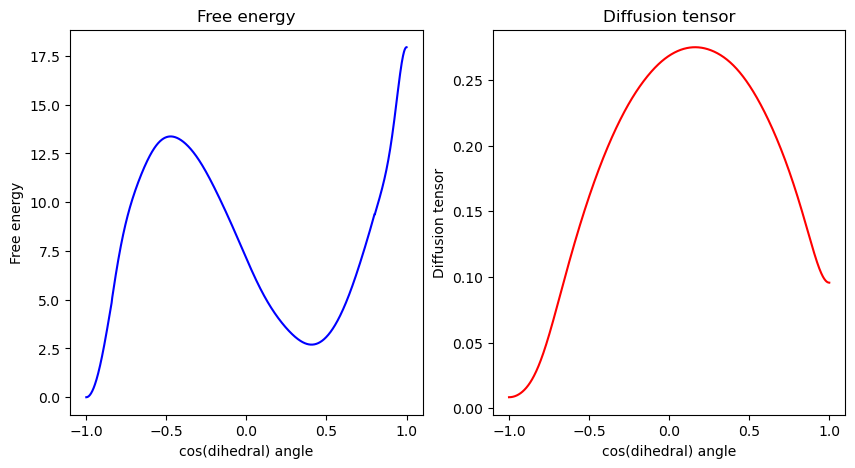

In [10]:
# visualize data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


# visualize free energy
axes[0].plot(data, free_energy, c='b')
axes[0].set_xlabel('cos(dihedral) angle')
axes[0].set_ylabel('Free energy')
axes[0].set_title('Free energy')

# visualize diffusion tensor
axes[1].plot(data, Ms, c='r')
axes[1].set_xlabel('cos(dihedral) angle')
axes[1].set_ylabel('Diffusion tensor')
axes[1].set_title('Diffusion tensor')


In [11]:
# prep transition rate calculation
# Define boundaries exactly as in original (using cos(dihedral) coordinates)
A_bool = data <= np.cos(np.pi - 0.2)
A_bool = A_bool.flatten()
B_bool = np.logical_and(data <= np.cos(np.pi/3 - 0.1), data >= np.cos(np.pi/3 + 0.1))
B_bool = B_bool.flatten()
C_bool = np.logical_not(np.logical_or(A_bool, B_bool))
C_bool = C_bool.flatten()

print(f"A points: {np.sum(A_bool)}, B points: {np.sum(B_bool)}, C points: {np.sum(C_bool)}")

# Compute Z_beta on full smoothed data
Z_beta = get_Z_beta(data, free_energy, kbT)
print(f'Z_beta: {Z_beta}')

A points: 10, B points: 87, C points: 903
Z_beta: 0.2624618577459913


In [12]:
interior_pts_bool = np.logical_and(C_bool, data <= np.min(data[B_bool]))
interior_pts = data[interior_pts_bool]
free_energy_interior_data = free_energy[interior_pts_bool]
Ms_interior_data = Ms[interior_pts_bool]

In [13]:
cheb_solver = ChebyshevCommittorSolver(interior_pts, free_energy_interior_data, Ms_interior_data, kbT, 
                                                     full_data=data, full_free_energy=free_energy, N=1000)
rate_cheb = cheb_solver.compute_rate()
print(f"Transition rate (Chebyshev): {rate_cheb:.6e}")

Transition rate (Chebyshev): 1.535469e-02


Dihedral angle

In [14]:
data_dir = np.load('data/dihedral_data.npz')
data = data_dir['evaluation_pts']
kbT = data_dir['kbT']
Ms = data_dir['diffusion_tensors']
free_energy = data_dir['free_energy']
free_energy = free_energy - np.min(free_energy)

Text(0.5, 1.0, 'Diffusion tensor')

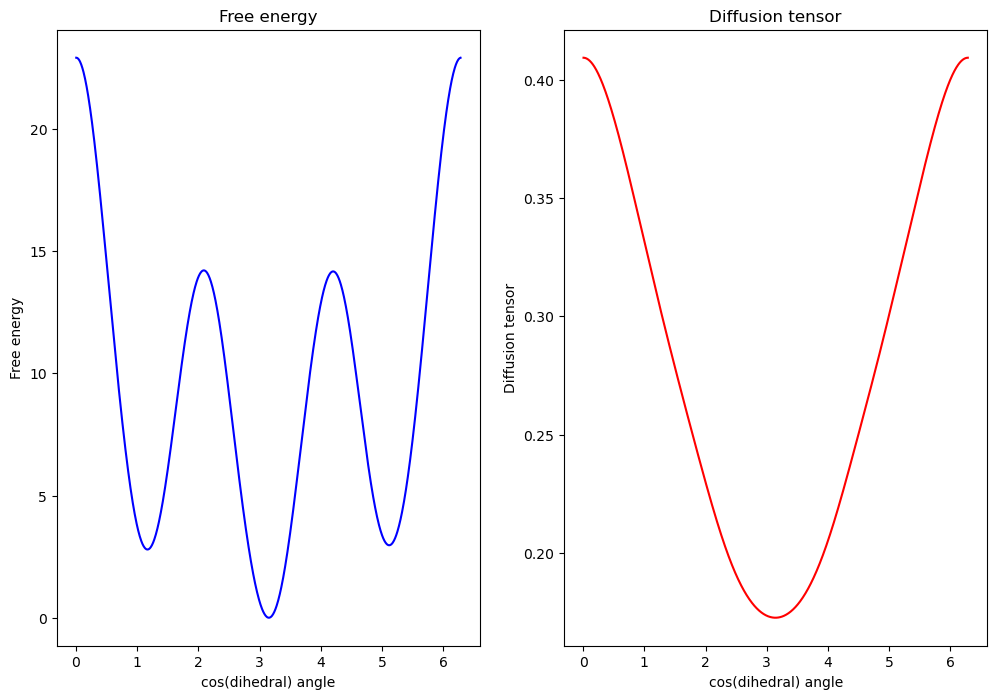

In [19]:
# visualize data
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

axes[0].plot(data, free_energy, c='b')
axes[0].set_xlabel('cos(dihedral) angle')
axes[0].set_ylabel('Free energy')
axes[0].set_title('Free energy')

axes[1].plot(data, Ms, c='r')
axes[1].set_xlabel('cos(dihedral) angle')
axes[1].set_ylabel('Diffusion tensor')
axes[1].set_title('Diffusion tensor')

In [15]:
# Define boundaries exactly 
dihedrals_ref = np.abs(data - np.pi)
anti = dihedrals_ref < 0.2
gauche = np.abs(dihedrals_ref - 2*np.pi/3) < 0.1
C_bool = np.logical_not(np.logical_or(anti, gauche)).flatten()
B_bool = gauche.flatten()
A_bool = anti.flatten()

print(f'A: {np.sum(A_bool)}, B: {np.sum(B_bool)}, C: {np.sum(C_bool)}')

A: 63, B: 64, C: 873


In [17]:
# Use Fourier solver exactly as simulation() class would
fourier_solver = FourierCommittorSolver(data, free_energy, Ms, kbT, A_bool, B_bool, C_bool)
committor = fourier_solver.solve_committor()
rate = fourier_solver.compute_rate()
print(f"Transition rate: {rate:.6e}")

Transition rate: 1.406834e-02


PlaneAlign

In [21]:
data_dir = np.load(f'data/PlaneAlignTanh.npz')
data = data_dir['evaluation_points']
Ms = data_dir['diffusion_tensors']
free_energy = data_dir['free_energy']
free_energy = free_energy - np.min(free_energy)
kbT = data_dir['kbT']

Text(0.5, 1.0, 'Diffusion tensor')

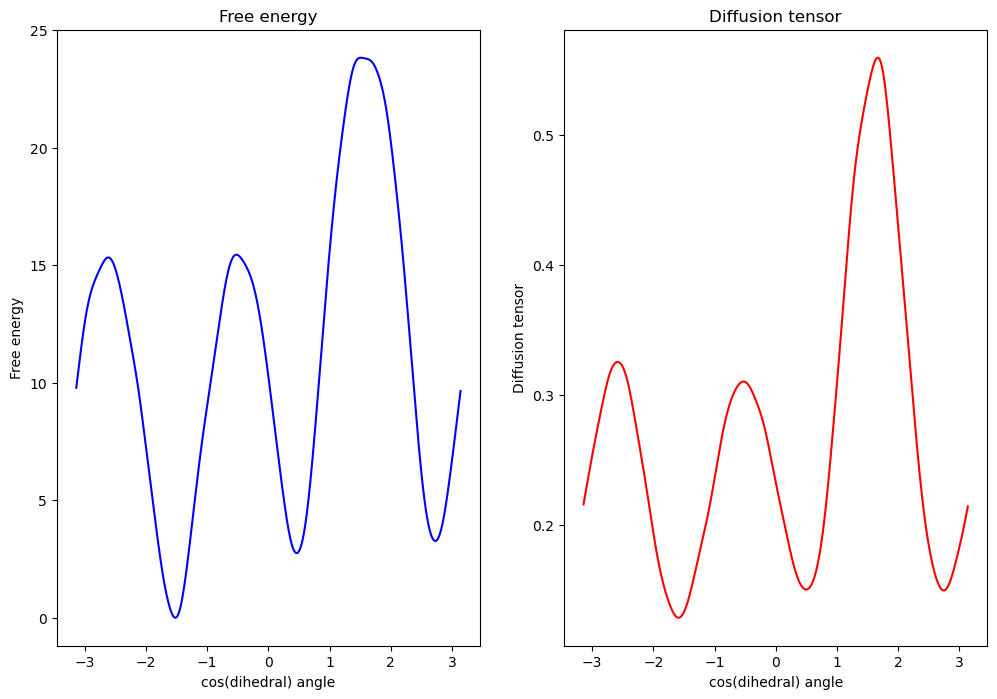

In [ ]:
# visualize data
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

axes[0].plot(data, free_energy, c='b')
axes[0].set_xlabel('cos(dihedral) angle')
axes[0].set_ylabel('Free energy')
axes[0].set_title('Free energy')

axes[1].plot(data, Ms, c='r')
axes[1].set_xlabel('dihedral angle')
axes[1].set_ylabel('Diffusion tensor')
axes[1].set_title('Diffusion tensor')

In [ ]:
# pick pre-chosen metastable regions corresponding to the dihedral angle basins
B_bool = np.logical_or(np.logical_and(data <= 0.6, data >= 0.43), np.logical_and(data <= 2.71, data >= 2.54))
A_bool = np.logical_and(data <= -1.41, data >= -1.75)
C_bool = np.logical_not(np.logical_or(A_bool,B_bool)).flatten()

In [24]:
fourier_solver = FourierCommittorSolver(data, free_energy, Ms, kbT, A_bool, B_bool, C_bool)
committor = fourier_solver.solve_committor()
rate = fourier_solver.compute_rate()
print(f"Transition rate: {rate:.6e}")

Transition rate: 1.245977e-02
